In [3]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os.path import getsize
%matplotlib inline

datadir = "./data/"
wordsFile = datadir + "words.txt"

# Load dataframe with metainf

In [4]:
def loadWords():
    columns=['filename', 'word', 'greylvl']
    
    with open(wordsFile, 'r') as words:
        rowsList = []
        for line in words:
            
            # if comment
            if line[0] == "#":
                continue
                
            data = line.split()
            data = [data[0], data[8], data[2]]        
            row = dict( (colName, data[i]) for i, colName in enumerate(columns))
            
            rowsList.append(row)
    
    df = pd.DataFrame(rowsList, columns=columns)
    return df

In [5]:
df = loadWords()
print(df.head())
print("Dataframe shape:", df.shape)

         filename  word greylvl
0  a01-000u-00-00     A     154
1  a01-000u-00-01  MOVE     154
2  a01-000u-00-02    to     154
3  a01-000u-00-03  stop     154
4  a01-000u-00-04   Mr.     154
Dataframe shape: (115320, 3)


# Function for prepare each image
Resizes and pastes into (32, 128) pattern. This shape is equal to receptive field of nn

In [6]:

def preprocessImg(filename):
    # Read and load
    filename = filename.split("-")
    path = "/".join([datadir + "words", filename[0], "-".join(filename[:2]), "-".join(filename)+'.png'])
  
    if not (getsize(path)):
        print("Corrupted file "+path)
        return np.zeros((32, 128))
    try:
        img = mpimg.imread(path)
    except:
        print("Problem with loading file "+path)
        return np.zeros((32, 128))

    
    # Resize
    (targetW, targetH) = (128, 32)
    (imgH, imgW) = img.shape
    
    fy = targetH / imgH
    fx = targetW / imgW
    f = min(fx, fy)
    
    newSize = (int(np.trunc(imgW*f)), int(np.trunc(imgH*f)))
    newImg = cv2.resize(img, newSize)
    
    
    # Fill to NN pattern
    pattern = np.ones((32, 128)) * 255
    pattern[0:newSize[1], 0:newSize[0]] = np.trunc(newImg * 255)

    return pattern

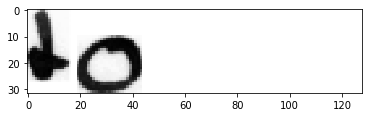

In [7]:
plt.imshow(preprocessImg("a01-000u-00-02"), cmap='gray')

# Image data generator

In [9]:
def batchGenerator(batchSize=1024, mode='train'):
    start = 0
    # 95% for train
    stop = int(df.shape[0] * 0.95)
    num = 0
    
    if (mode == 'valid'):
            # 5% for validation
            self.start = int(df.shape[0]*0.95)
            self.stop = df.shape[0]
    
    while start + batchSize < stop:
        num += 1
        pathes = df.loc[start:start+batchSize, 'filename']
        imgs = [preprocessImg(path) for path in pathes]
        batch = np.stack(imgs, axis=0)
        start += batchSize
        
        yield batch

In [11]:
for batch in batchGenerator(batchSize=8192, mode='train'):
    print(batch.shape)

Corrupted file ./data/words/a01/a01-117/a01-117-05-02.png
Batch 1
(8193, 32, 128)
Batch 2
(8193, 32, 128)
Batch 3
(8193, 32, 128)
Batch 4
(8193, 32, 128)
Batch 5
(8193, 32, 128)
Batch 6
(8193, 32, 128)
Batch 7
(8193, 32, 128)
Batch 8
(8193, 32, 128)
Batch 9
(8193, 32, 128)
Batch 10
(8193, 32, 128)
Batch 11
(8193, 32, 128)
Batch 12
(8193, 32, 128)
Batch 13
(8193, 32, 128)
